In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import statistics as st
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import visualisation
import plotly
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import math

In [105]:
data = pd.read_csv(r'DeSeq2_counts_wDE_genes_251124_rmvD5.csv')
data = data.set_index('Ensembl')
data = data.transpose()
data = data.iloc[:41]
data

Ensembl,ENSCGRG00001000543,ENSCGRG00001000553,ENSCGRG00001000597,ENSCGRG00001000666,ENSCGRG00001000697,ENSCGRG00001000766,ENSCGRG00001000770,ENSCGRG00001000771,ENSCGRG00001000818,ENSCGRG00001000868,...,ENSCGRG00001012666,ENSCGRG00001011454,ENSCGRG00001012639,ENSCGRG00001012183,ENSCGRG00001012897,ENSCGRG00001006676,ENSCGRG00001010711,ENSCGRG00001012940,ENSCGRG00001012950,ENSCGRG00001004717
B12_D4_1,405.398368,6313.246205,463.466039,1242.002958,46.239071,1.075327,316.146208,3088.339823,1.075327,3633.530732,...,1.075327,309.694244,33.335144,3.225982,216.140775,13.979254,9188.671235,171656.637404,144830.448837,305.392935
B12_D4_2,389.593654,6264.537512,488.062379,1194.468454,36.390616,0.0,343.570227,2997.944571,0.0,3597.319422,...,0.0,307.179611,44.953114,2.140624,232.257755,7.492186,9066.614944,170240.653182,144467.53456,302.898363
B13_D4_1,430.300989,6205.146503,517.486156,1274.028418,40.311422,0.0,358.11542,2961.483276,1.87495,3589.591473,...,1.87495,355.302995,36.561522,3.7499,212.806807,6.562324,8972.572471,153417.770852,132217.712984,334.678547
B13_D4_2,408.992563,6280.890372,496.032171,1212.939044,50.539127,0.0,346.28661,3009.885775,0.93591,3555.521163,...,0.93591,332.247963,39.30821,5.615459,219.002883,4.679549,9097.978737,153861.692048,132722.298392,288.260205
B14_D4_1,387.4804,6130.388901,501.674876,1055.078873,49.777079,0.0,384.552337,2997.36098,0.0,3537.100681,...,3.904085,316.230856,48.801058,0.0,257.669586,9.760212,8066.814881,128891.402242,109828.732982,230.340994
B14_D4_2,418.055333,6076.453804,561.639758,999.230388,36.140297,0.0,366.286799,3031.877931,4.883824,3377.652669,...,2.930294,353.588857,46.88471,3.907059,285.215321,10.744413,7920.585741,128896.812937,110317.769729,274.470908
B12_D6_1,467.821332,6568.856776,499.009421,1235.693588,37.640797,0.0,419.426022,2992.981075,0.0,3006.961943,...,0.0,304.352729,38.716248,1.075451,251.655613,3.226354,5370.803985,133120.442147,118034.010768,276.390994
B12_D6_2,478.798614,6193.318982,531.284368,1253.231271,43.916651,0.0,412.388068,3016.324153,1.071138,3019.537566,...,2.142276,306.345422,36.418687,5.355689,252.78853,8.569103,5497.079387,132814.665135,115981.734004,328.839316
B13_D6_1,493.894716,6490.368855,541.660162,1291.57767,55.407918,0.0,389.766043,3040.748317,0.955309,3033.105846,...,0.0,343.911214,36.301739,2.865927,212.078582,8.59778,5496.84757,147528.357711,129986.975179,298.056385
B13_D6_2,419.232736,6469.935726,504.225249,1246.238542,52.523463,0.0,378.168937,3061.640434,0.954972,3011.981886,...,2.864916,323.735529,44.883687,2.864916,207.228938,2.864916,5359.303217,147653.005509,129933.498881,272.167038


In [106]:
X = data
pca = PCA(n_components=8)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.61870141 0.20001057 0.08442359 0.03055638 0.02139186 0.01047127
 0.00951888 0.00754577]
[360742.85284251 205108.49932659 133256.71138986  80169.30741312
  67078.20361621  46930.67082065  44745.57693965  39839.05084173]


In [107]:
labels = data.index # The labels give the sample-type for each cell 
N, D = data.shape
data_unlabelled = data.copy() # this dataframe doesn't have labels in an extra column and is used in the PCA function
data['label'] = labels 

W, scores, fracs = visualisation.do_pca(data_unlabelled, n_components=8)
scores = scores/abs(scores).max().max()
scores['label'] = labels
scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,label
B12_D4_1,0.934327,0.063835,-0.290480,-0.110342,-0.284397,0.045135,-0.207355,-0.004786,B12_D4_1
B12_D4_2,0.935987,0.069073,-0.285996,-0.111210,-0.277490,0.048230,-0.208481,0.015035,B12_D4_2
B13_D4_1,0.924653,0.111962,-0.304502,-0.046149,-0.243883,0.047380,-0.211319,0.028045,B13_D4_1
B13_D4_2,0.925248,0.117717,-0.290028,-0.051374,-0.239394,0.038490,-0.216681,0.047540,B13_D4_2
B14_D4_1,0.824268,0.085025,-0.319842,-0.037652,-0.220992,0.183331,0.062531,-0.147787,B14_D4_1
B14_D4_2,0.828320,0.094979,-0.315614,-0.040725,-0.217986,0.182516,0.051811,-0.143066,B14_D4_2
B12_D6_1,0.633546,0.020412,-0.102584,0.067485,0.157127,0.012315,0.271780,-0.180263,B12_D6_1
B12_D6_2,0.634820,0.020185,-0.100581,0.070084,0.151102,0.009124,0.263180,-0.191061,B12_D6_2
B13_D6_1,0.662287,0.149796,-0.163679,0.184129,0.184417,0.016618,0.054465,0.043386,B13_D6_1
B13_D6_2,0.660300,0.150272,-0.150143,0.183684,0.185069,0.015738,0.035650,0.062909,B13_D6_2


In [108]:
colour_dict = {}
for n in range(len(scores)):
    if 'D4' in scores.index.to_list()[n]:
        colour_dict[scores.index.to_list()[n]] = 'red'
    if 'D6' in scores.index.to_list()[n]:
        colour_dict[scores.index.to_list()[n]] = 'yellow'
    if 'D7' in scores.index.to_list()[n]:
        colour_dict[scores.index.to_list()[n]] = 'yellowgreen'
    if 'D8' in scores.index.to_list()[n]:
        colour_dict[scores.index.to_list()[n]] = 'darkgreen'
    if 'D11' in scores.index.to_list()[n]:
        colour_dict[scores.index.to_list()[n]] = 'navy'
    if 'D12' in scores.index.to_list()[n]:
        colour_dict[scores.index.to_list()[n]] = 'darkblue'
    if 'D14' in scores.index.to_list()[n]:
        colour_dict[scores.index.to_list()[n]] = 'violet'
colour_dict

{'B12_D4_1': 'red',
 'B12_D4_2': 'red',
 'B13_D4_1': 'red',
 'B13_D4_2': 'red',
 'B14_D4_1': 'red',
 'B14_D4_2': 'red',
 'B12_D6_1': 'yellow',
 'B12_D6_2': 'yellow',
 'B13_D6_1': 'yellow',
 'B13_D6_2': 'yellow',
 'B14_D6_1': 'yellow',
 'B14_D6_2': 'yellow',
 'B12_D7_1': 'yellowgreen',
 'B12_D7_2': 'yellowgreen',
 'B13_D7_1': 'yellowgreen',
 'B13_D7_2': 'yellowgreen',
 'B14_D7_1': 'yellowgreen',
 'B14_D7_2': 'yellowgreen',
 'B12_D8_1': 'darkgreen',
 'B12_D8_2': 'darkgreen',
 'B13_D8_1': 'darkgreen',
 'B13_D8_2': 'darkgreen',
 'B14_D8_1': 'darkgreen',
 'B14_D8_2': 'darkgreen',
 'B12_D11_2': 'navy',
 'B13_D11_1': 'navy',
 'B13_D11_2': 'navy',
 'B14_D11_1': 'navy',
 'B14_D11_2': 'navy',
 'B12_D12_1': 'darkblue',
 'B12_D12_2': 'darkblue',
 'B13_D12_1': 'darkblue',
 'B13_D12_2': 'darkblue',
 'B14_D12_1': 'darkblue',
 'B14_D12_2': 'darkblue',
 'B12_D14_1': 'violet',
 'B12_D14_2': 'violet',
 'B13_D14_1': 'violet',
 'B13_D14_2': 'violet',
 'B14_D14_1': 'violet',
 'B14_D14_2': 'violet'}

In [109]:
colours = []
for k,v in colour_dict.items():
    colours.append(v)
scores['colour'] = colours
scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,label,colour
B12_D4_1,0.934327,0.063835,-0.290480,-0.110342,-0.284397,0.045135,-0.207355,-0.004786,B12_D4_1,red
B12_D4_2,0.935987,0.069073,-0.285996,-0.111210,-0.277490,0.048230,-0.208481,0.015035,B12_D4_2,red
B13_D4_1,0.924653,0.111962,-0.304502,-0.046149,-0.243883,0.047380,-0.211319,0.028045,B13_D4_1,red
B13_D4_2,0.925248,0.117717,-0.290028,-0.051374,-0.239394,0.038490,-0.216681,0.047540,B13_D4_2,red
B14_D4_1,0.824268,0.085025,-0.319842,-0.037652,-0.220992,0.183331,0.062531,-0.147787,B14_D4_1,red
B14_D4_2,0.828320,0.094979,-0.315614,-0.040725,-0.217986,0.182516,0.051811,-0.143066,B14_D4_2,red
B12_D6_1,0.633546,0.020412,-0.102584,0.067485,0.157127,0.012315,0.271780,-0.180263,B12_D6_1,yellow
B12_D6_2,0.634820,0.020185,-0.100581,0.070084,0.151102,0.009124,0.263180,-0.191061,B12_D6_2,yellow
B13_D6_1,0.662287,0.149796,-0.163679,0.184129,0.184417,0.016618,0.054465,0.043386,B13_D6_1,yellow
B13_D6_2,0.660300,0.150272,-0.150143,0.183684,0.185069,0.015738,0.035650,0.062909,B13_D6_2,yellow


In [110]:
day_4_x = scores.iloc[0:6,0].to_list()
day_4_y = scores.iloc[0:6,1].to_list()

day_6_x = scores.iloc[6:12,0].to_list()
day_6_y = scores.iloc[6:12,1].to_list()

day_7_x = scores.iloc[12:18,0].to_list()
day_7_y = scores.iloc[12:18,1].to_list()

day_8_x = scores.iloc[18:24,0].to_list()
day_8_y = scores.iloc[18:24,1].to_list()

day_11_x = scores.iloc[24:29,0].to_list()
day_11_y = scores.iloc[24:29,1].to_list()

day_12_x = scores.iloc[29:35,0].to_list()
day_12_y = scores.iloc[29:35,1].to_list()

day_14_x = scores.iloc[35:,0].to_list()
day_14_y = scores.iloc[35:,1].to_list()

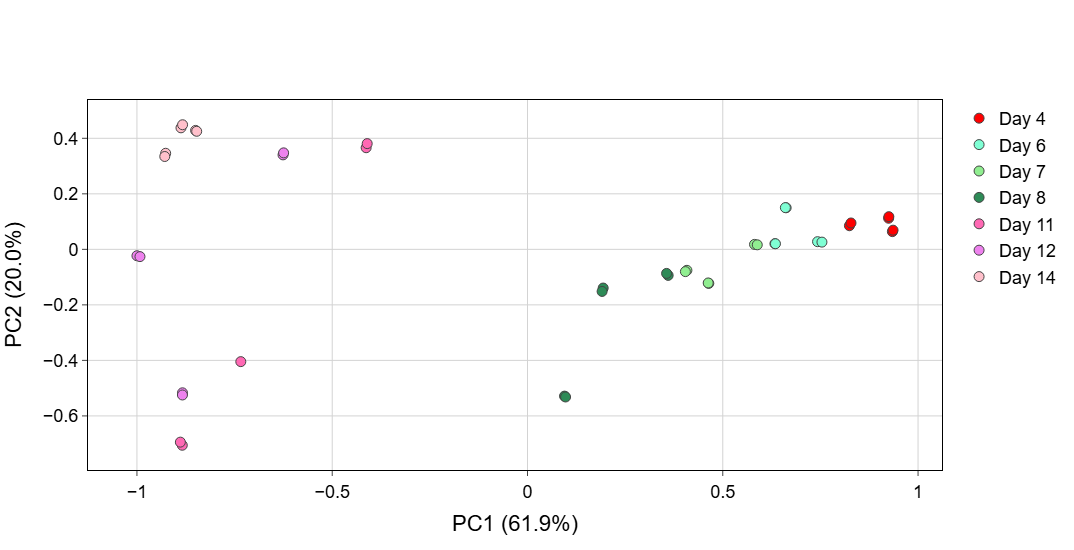

In [111]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=day_4_x,
    y=day_4_y,
    legendgroup="group", name="Day 4",
    mode="markers", marker_line_width=1, marker_size=10,
    marker=dict(color="red", size=10)
))

fig.add_trace(go.Scatter(
    x=day_6_x,
    y=day_6_y,
    legendgroup="group", name='Day 6',
    mode="markers", marker_line_width=1, marker_size=10,
    marker=dict(color="aquamarine", size=10)
))

fig.add_trace(go.Scatter(
    x=day_7_x,
    y=day_7_y,
    legendgroup="group", name='Day 7',
    mode="markers", marker_line_width=1, marker_size=10,
    marker=dict(color="lightgreen", size=10)
))

fig.add_trace(go.Scatter(
    x=day_8_x,
    y=day_8_y,
    legendgroup="group", name='Day 8',
    mode="markers", marker_line_width=1, marker_size=10,
    marker=dict(color="seagreen", size=10)
))

fig.add_trace(go.Scatter(
    x=day_11_x,
    y=day_11_y,
    legendgroup="group", name='Day 11',
    mode="markers", marker_line_width=1, marker_size=10,
    marker=dict(color="hotpink", size=10)
))

fig.add_trace(go.Scatter(
    x=day_12_x,
    y=day_12_y,
    legendgroup="group", name='Day 12',
    mode="markers", marker_line_width=1, marker_size=10,
    marker=dict(color="violet", size=10)
))

fig.add_trace(go.Scatter(
    x=day_14_x,
    y=day_14_y,
    legendgroup="group", name='Day 14',
    mode="markers", marker_line_width=1, marker_size=10,
    marker=dict(color="pink", size=10)
))


fig.update_layout(xaxis_title='PC1 (61.9%)', yaxis_title='PC2 (20.0%)',width=550,height=550,
                 font_family='Arial',font=dict(size=18),font_color='black',plot_bgcolor='white')
fig.update_xaxes(showgrid=True, gridwidth=1,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey'
)
fig.update_yaxes(showgrid=True, gridwidth=1,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey'
)

fig.show()

In [30]:
z = pd.read_csv(r'DeSeq2_counts_wDE_genes_251124_rmvD5.csv')
z = z.set_index('Ensembl')
z

,B12_D4_1,B12_D4_2,B13_D4_1,B13_D4_2,B14_D4_1,B14_D4_2,B12_D6_1,B12_D6_2,B13_D6_1,B13_D6_2,...,padj_7v8,log2FoldChange_7v8,padj_8v11,log2FoldChange_8v11,padj_11v12,log2FoldChange_11v12,padj_12v14,log2FoldChange_12v14,GeneID,isSig
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSCGRG00001000543,405.398368,389.593654,430.300989,408.992563,387.480400,418.055333,467.821332,478.798614,493.894716,419.232736,...,NaN,NaN,3.018855e-02,0.134894,NaN,NaN,NaN,NaN,100755360.0,+
ENSCGRG00001000553,6313.246205,6264.537512,6205.146503,6280.890372,6130.388901,6076.453804,6568.856776,6193.318982,6490.368855,6469.935726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100750732.0,NaN
ENSCGRG00001000597,463.466039,488.062379,517.486156,496.032171,501.674876,561.639758,499.009421,531.284368,541.660162,504.225249,...,NaN,NaN,6.802038e-04,-0.276319,NaN,NaN,NaN,NaN,NaN,+
ENSCGRG00001000666,1242.002958,1194.468454,1274.028418,1212.939044,1055.078873,999.230388,1235.693588,1253.231271,1291.577670,1246.238542,...,0.005226,-0.266636,2.256643e-24,-0.844755,NaN,NaN,NaN,NaN,100755252.0,+
ENSCGRG00001000697,46.239071,36.390616,40.311422,50.539127,49.777079,36.140297,37.640797,43.916651,55.407918,52.523463,...,NaN,NaN,NaN,NaN,NaN,NaN,0.048088,0.421968,NaN,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSCGRG00001006676,13.979254,7.492186,6.562324,4.679549,9.760212,10.744413,3.226354,8.569103,8.597780,2.864916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100689271.0,NaN
ENSCGRG00001010711,9188.671235,9066.614944,8972.572471,9097.978737,8066.814881,7920.585741,5370.803985,5497.079387,5496.847570,5359.303217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSCGRG00001012940,171656.637404,170240.653182,153417.770852,153861.692048,128891.402242,128896.812937,133120.442147,132814.665135,147528.357711,147653.005509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+


In [31]:
not_signif = []

subset = z[['padj_4v6','padj_6v7','padj_7v8','padj_8v11','padj_11v12','padj_12v14']]

for n in range(len(subset)):
    if math.isnan(subset.iloc[n,0])==True:
        if math.isnan(subset.iloc[n,1])==True:
            if math.isnan(subset.iloc[n,2])==True:
                if math.isnan(subset.iloc[n,3])==True:
                    if math.isnan(subset.iloc[n,4])==True:
                        if math.isnan(subset.iloc[n,5])==True:
                            not_signif.append(subset.index.to_list()[n])
z2 = z.drop(not_signif)
print('length of original df:',len(z),'length of signif values df',len(z2))
print(z2)

length of original df: 12923 length of signif values df 8511
                         B12_D4_1       B12_D4_2       B13_D4_1  \
Ensembl                                                           
ENSCGRG00001000543     405.398368     389.593654     430.300989   
ENSCGRG00001000597     463.466039     488.062379     517.486156   
ENSCGRG00001000666    1242.002958    1194.468454    1274.028418   
ENSCGRG00001000697      46.239071      36.390616      40.311422   
ENSCGRG00001000766       1.075327       0.000000       0.000000   
...                           ...            ...            ...   
ENSCGRG00001011454     309.694244     307.179611     355.302995   
ENSCGRG00001012183       3.225982       2.140624       3.749900   
ENSCGRG00001012940  171656.637404  170240.653182  153417.770852   
ENSCGRG00001012950  144830.448837  144467.534560  132217.712984   
ENSCGRG00001004717     305.392935     302.898363     334.678547   

                         B13_D4_2       B14_D4_1       B14_D4_2  \


In [32]:
d4_averages = []
for n in range(len(z2)):
    d4_averages.append((sum(z2[['B12_D4_1','B12_D4_2','B13_D4_1','B13_D4_2','B14_D4_1','B14_D4_2']].iloc[n,:].to_list()))/6)

d6_averages = []
for n in range(len(z2)):
    d6_averages.append((sum(z2[['B12_D6_1','B12_D6_2','B13_D6_1','B13_D6_2','B14_D6_1','B14_D6_2']].iloc[n,:].to_list()))/6)

d7_averages = []
for n in range(len(z2)):
    d7_averages.append((sum(z2[['B12_D7_1','B12_D7_2','B13_D7_1','B13_D7_2','B14_D7_1','B14_D7_2']].iloc[n,:].to_list()))/6)

d8_averages = []
for n in range(len(z2)):
    d8_averages.append((sum(z2[['B12_D8_1','B12_D8_2','B13_D8_1','B13_D8_2','B14_D8_1','B14_D8_2']].iloc[n,:].to_list()))/6)

d11_averages = []
for n in range(len(z2)):
    d11_averages.append((sum(z2[['B12_D11_2','B13_D11_1','B13_D11_2','B14_D11_1','B14_D11_2']].iloc[n,:].to_list()))/5)

d12_averages = []
for n in range(len(z2)):
    d12_averages.append((sum(z2[['B12_D12_1','B12_D12_2','B13_D12_1','B13_D12_2','B14_D12_1','B14_D12_2']].iloc[n,:].to_list()))/6)

d14_averages = []
for n in range(len(z2)):
    d14_averages.append((sum(z2[['B12_D14_1','B12_D14_2','B13_D14_1','B13_D14_2','B14_D14_1','B14_D14_2']].iloc[n,:].to_list()))/6)

z2['day4_avg'] = d4_averages
z2['day6_avg'] = d6_averages
z2['day7_avg'] = d7_averages
z2['day8_avg'] = d8_averages
z2['day11_avg'] = d11_averages
z2['day12_avg'] = d12_averages
z2['day14_avg'] = d14_averages
z2

,B12_D4_1,B12_D4_2,B13_D4_1,B13_D4_2,B14_D4_1,B14_D4_2,B12_D6_1,B12_D6_2,B13_D6_1,B13_D6_2,...,log2FoldChange_12v14,GeneID,isSig,day4_avg,day6_avg,day7_avg,day8_avg,day11_avg,day12_avg,day14_avg
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSCGRG00001000543,405.398368,389.593654,430.300989,408.992563,387.480400,418.055333,467.821332,478.798614,493.894716,419.232736,...,NaN,100755360.0,+,406.636885,453.476428,484.611060,448.590349,492.174696,502.863248,484.727416
ENSCGRG00001000597,463.466039,488.062379,517.486156,496.032171,501.674876,561.639758,499.009421,531.284368,541.660162,504.225249,...,NaN,NaN,+,504.726897,518.579079,535.496005,556.806120,459.462919,431.043714,461.830808
ENSCGRG00001000666,1242.002958,1194.468454,1274.028418,1212.939044,1055.078873,999.230388,1235.693588,1253.231271,1291.577670,1246.238542,...,NaN,100755252.0,+,1162.958022,1209.476068,1083.569298,901.499706,501.013286,484.843193,433.820730
ENSCGRG00001000697,46.239071,36.390616,40.311422,50.539127,49.777079,36.140297,37.640797,43.916651,55.407918,52.523463,...,0.421968,NaN,+,43.232935,47.492832,36.383353,41.513275,39.738598,40.419808,53.054388
ENSCGRG00001000766,1.075327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,100755037.0,+,0.179221,0.000000,0.812819,0.462986,2.866341,4.717873,4.499959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSCGRG00001011454,309.694244,307.179611,355.302995,332.247963,316.230856,353.588857,304.352729,306.345422,343.911214,323.735529,...,NaN,NaN,+,329.040754,307.904200,322.368954,332.507642,413.830669,428.436558,408.099261
ENSCGRG00001012183,3.225982,2.140624,3.749900,5.615459,0.000000,3.907059,1.075451,5.355689,2.865927,2.864916,...,NaN,NaN,+,3.106504,3.572616,4.594302,5.394126,12.167903,15.004833,12.958002
ENSCGRG00001012940,171656.637404,170240.653182,153417.770852,153861.692048,128891.402242,128896.812937,133120.442147,132814.665135,147528.357711,147653.005509,...,NaN,NaN,+,151160.828111,131407.470143,170167.061837,151276.043439,169269.367012,174297.371774,191283.842534


In [33]:
d4_z = []
for n in range(len(z2)):
    d4_z.append(((z2[['day4_avg']]).iloc[n,0]-(sum(z2[['day4_avg','day6_avg','day7_avg',
    'day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))/7)/st.stdev(z2[['day4_avg',
    'day6_avg','day7_avg','day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))
d6_z = []
for n in range(len(z2)):
    d6_z.append(((z2[['day6_avg']]).iloc[n,0]-(sum(z2[['day4_avg','day6_avg','day7_avg',
    'day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))/7)/st.stdev(z2[['day4_avg',
    'day6_avg','day7_avg','day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))
d7_z = []
for n in range(len(z2)):
    d7_z.append(((z2[['day7_avg']]).iloc[n,0]-(sum(z2[['day4_avg','day6_avg','day7_avg',
    'day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))/7)/st.stdev(z2[['day4_avg',
    'day6_avg','day7_avg','day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))
d8_z = []
for n in range(len(z2)):
    d8_z.append(((z2[['day8_avg']]).iloc[n,0]-(sum(z2[['day4_avg','day6_avg','day7_avg',
    'day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))/7)/st.stdev(z2[['day4_avg',
    'day6_avg','day7_avg','day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))
d11_z = []
for n in range(len(z2)):
    d11_z.append(((z2[['day11_avg']]).iloc[n,0]-(sum(z2[['day4_avg','day6_avg','day7_avg',
    'day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))/7)/st.stdev(z2[['day4_avg',
    'day6_avg','day7_avg','day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))
d12_z = []
for n in range(len(z2)):
    d12_z.append(((z2[['day12_avg']]).iloc[n,0]-(sum(z2[['day4_avg','day6_avg','day7_avg',
    'day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))/7)/st.stdev(z2[['day4_avg',
    'day6_avg','day7_avg','day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))
d14_z = []
for n in range(len(z2)):
    d14_z.append(((z2[['day14_avg']]).iloc[n,0]-(sum(z2[['day4_avg','day6_avg','day7_avg',
    'day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))/7)/st.stdev(z2[['day4_avg',
    'day6_avg','day7_avg','day8_avg','day11_avg','day12_avg','day14_avg']].iloc[n,:].to_list()))
z2['day4_z'] = d4_z
z2['day6_z'] = d6_z
z2['day7_z'] = d7_z
z2['day8_z'] = d8_z
z2['day11_z'] = d11_z
z2['day12_z'] = d12_z
z2['day14_z'] = d14_z
z2

,B12_D4_1,B12_D4_2,B13_D4_1,B13_D4_2,B14_D4_1,B14_D4_2,B12_D6_1,B12_D6_2,B13_D6_1,B13_D6_2,...,day11_avg,day12_avg,day14_avg,day4_z,day6_z,day7_z,day8_z,day11_z,day12_z,day14_z
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSCGRG00001000543,405.398368,389.593654,430.300989,408.992563,387.480400,418.055333,467.821332,478.798614,493.894716,419.232736,...,492.174696,502.863248,484.727416,-1.822809,-0.421904,0.509289,-0.568040,0.735507,1.055187,0.512769
ENSCGRG00001000597,463.466039,488.062379,517.486156,496.032171,501.674876,561.639758,499.009421,531.284368,541.660162,504.225249,...,459.462919,431.043714,461.830808,0.203377,0.506104,0.875808,1.341522,-0.785827,-1.406904,-0.734079
ENSCGRG00001000666,1242.002958,1194.468454,1274.028418,1212.939044,1055.078873,999.230388,1235.693588,1253.231271,1291.577670,1246.238542,...,501.013286,484.843193,433.820730,0.982620,1.117997,0.751583,0.221723,-0.943774,-0.990832,-1.139318
ENSCGRG00001000697,46.239071,36.390616,40.311422,50.539127,49.777079,36.140297,37.640797,43.916651,55.407918,52.523463,...,39.738598,40.419808,53.054388,0.020489,0.788661,-1.214671,-0.289611,-0.609632,-0.486792,1.791557
ENSCGRG00001000766,1.075327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.866341,4.717873,4.499959,-0.852214,-0.939245,-0.544535,-0.714416,0.452667,1.351782,1.245961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSCGRG00001011454,309.694244,307.179611,355.302995,332.247963,316.230856,353.588857,304.352729,306.345422,343.911214,323.735529,...,413.830669,428.436558,408.099261,-0.667851,-1.081461,-0.798408,-0.600010,0.991357,1.277171,0.879202
ENSCGRG00001012183,3.225982,2.140624,3.749900,5.615459,0.000000,3.907059,1.075451,5.355689,2.865927,2.864916,...,12.167903,15.004833,12.958002,-0.992071,-0.899727,-0.697315,-0.538857,0.803133,1.365173,0.959664
ENSCGRG00001012940,171656.637404,170240.653182,153417.770852,153861.692048,128891.402242,128896.812937,133120.442147,132814.665135,147528.357711,147653.005509,...,169269.367012,174297.371774,191283.842534,-0.589946,-1.600323,0.382215,-0.584053,0.336298,0.593479,1.462330


In [34]:
z_df = z2[['day4_z','day6_z','day7_z','day8_z','day11_z','day12_z','day14_z']]
z_df

,day4_z,day6_z,day7_z,day8_z,day11_z,day12_z,day14_z
Ensembl,,,,,,,
ENSCGRG00001000543,-1.822809,-0.421904,0.509289,-0.568040,0.735507,1.055187,0.512769
ENSCGRG00001000597,0.203377,0.506104,0.875808,1.341522,-0.785827,-1.406904,-0.734079
ENSCGRG00001000666,0.982620,1.117997,0.751583,0.221723,-0.943774,-0.990832,-1.139318
ENSCGRG00001000697,0.020489,0.788661,-1.214671,-0.289611,-0.609632,-0.486792,1.791557
ENSCGRG00001000766,-0.852214,-0.939245,-0.544535,-0.714416,0.452667,1.351782,1.245961
...,...,...,...,...,...,...,...
ENSCGRG00001011454,-0.667851,-1.081461,-0.798408,-0.600010,0.991357,1.277171,0.879202
ENSCGRG00001012183,-0.992071,-0.899727,-0.697315,-0.538857,0.803133,1.365173,0.959664
ENSCGRG00001012940,-0.589946,-1.600323,0.382215,-0.584053,0.336298,0.593479,1.462330


In [35]:
hp = z_df
highest_in = []
for n in range(len(hp)):
    if hp.iloc[n,0] > hp.iloc[n,1]:
        if hp.iloc[n,0] > hp.iloc[n,2]:
            if hp.iloc[n,0] > hp.iloc[n,3]:
                if hp.iloc[n,0] > hp.iloc[n,4]:
                    if hp.iloc[n,0] > hp.iloc[n,5]:
                        if hp.iloc[n,0] > hp.iloc[n,6]:
                            highest_in.append('4')
    if hp.iloc[n,1] > hp.iloc[n,0]:
        if hp.iloc[n,1] > hp.iloc[n,2]:
            if hp.iloc[n,1] > hp.iloc[n,3]:
                if hp.iloc[n,1] > hp.iloc[n,4]:
                    if hp.iloc[n,1] > hp.iloc[n,5]:
                        if hp.iloc[n,1] > hp.iloc[n,6]:
                            highest_in.append('6')
    if hp.iloc[n,2] > hp.iloc[n,0]:
        if hp.iloc[n,2] > hp.iloc[n,1]:
            if hp.iloc[n,2] > hp.iloc[n,3]:
                if hp.iloc[n,2] > hp.iloc[n,4]:
                    if hp.iloc[n,2] > hp.iloc[n,5]:
                        if hp.iloc[n,2] > hp.iloc[n,6]:
                            highest_in.append('7')
    if hp.iloc[n,3] > hp.iloc[n,0]:
        if hp.iloc[n,3] > hp.iloc[n,1]:
            if hp.iloc[n,3] > hp.iloc[n,2]:
                if hp.iloc[n,3] > hp.iloc[n,4]:
                    if hp.iloc[n,3] > hp.iloc[n,5]:
                        if hp.iloc[n,3] > hp.iloc[n,6]:
                            highest_in.append('8')
    if hp.iloc[n,4] > hp.iloc[n,0]:
        if hp.iloc[n,4] > hp.iloc[n,1]:
            if hp.iloc[n,4] > hp.iloc[n,2]:
                if hp.iloc[n,4] > hp.iloc[n,3]:
                    if hp.iloc[n,4] > hp.iloc[n,5]:
                        if hp.iloc[n,4] > hp.iloc[n,6]:
                            highest_in.append('11')
    if hp.iloc[n,5] > hp.iloc[n,0]:
        if hp.iloc[n,5] > hp.iloc[n,1]:
            if hp.iloc[n,5] > hp.iloc[n,2]:
                if hp.iloc[n,5] > hp.iloc[n,3]:
                    if hp.iloc[n,5] > hp.iloc[n,4]:
                        if hp.iloc[n,5] > hp.iloc[n,6]:
                            highest_in.append('12')
    if hp.iloc[n,6] > hp.iloc[n,0]:
        if hp.iloc[n,6] > hp.iloc[n,1]:
            if hp.iloc[n,6] > hp.iloc[n,2]:
                if hp.iloc[n,6] > hp.iloc[n,3]:
                    if hp.iloc[n,6] > hp.iloc[n,4]:
                        if hp.iloc[n,6] > hp.iloc[n,5]:
                            highest_in.append('14')
hp['peak'] = highest_in
hp

C:\Users\p04121km\AppData\Local\Temp\ipykernel_14832\4069852504.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp['peak'] = highest_in


,day4_z,day6_z,day7_z,day8_z,day11_z,day12_z,day14_z,peak
Ensembl,,,,,,,,
ENSCGRG00001000543,-1.822809,-0.421904,0.509289,-0.568040,0.735507,1.055187,0.512769,12
ENSCGRG00001000597,0.203377,0.506104,0.875808,1.341522,-0.785827,-1.406904,-0.734079,8
ENSCGRG00001000666,0.982620,1.117997,0.751583,0.221723,-0.943774,-0.990832,-1.139318,6
ENSCGRG00001000697,0.020489,0.788661,-1.214671,-0.289611,-0.609632,-0.486792,1.791557,14
ENSCGRG00001000766,-0.852214,-0.939245,-0.544535,-0.714416,0.452667,1.351782,1.245961,12
...,...,...,...,...,...,...,...,...
ENSCGRG00001011454,-0.667851,-1.081461,-0.798408,-0.600010,0.991357,1.277171,0.879202,12
ENSCGRG00001012183,-0.992071,-0.899727,-0.697315,-0.538857,0.803133,1.365173,0.959664,12
ENSCGRG00001012940,-0.589946,-1.600323,0.382215,-0.584053,0.336298,0.593479,1.462330,14


In [36]:
hp_sorted = hp.sort_values(by=['peak'],ascending=False)
hp_sorted

,day4_z,day6_z,day7_z,day8_z,day11_z,day12_z,day14_z,peak
Ensembl,,,,,,,,
ENSCGRG00001012959,0.241726,0.278717,1.088762,1.313590,-1.155525,-0.716153,-1.051117,8
ENSCGRG00001022082,-0.782528,-0.664237,-1.519652,1.150413,0.734333,0.848565,0.233106,8
ENSCGRG00001015227,-1.525794,-0.137145,0.206325,1.414214,0.518784,0.545377,-1.021762,8
ENSCGRG00001013410,0.059136,0.373873,0.583842,1.591524,-0.513812,-0.534786,-1.559777,8
ENSCGRG00001016824,0.661978,0.935740,-0.377947,1.352157,-0.377228,-0.810691,-1.384010,8
...,...,...,...,...,...,...,...,...
ENSCGRG00001016343,-1.217402,-0.899861,-0.643827,-0.275696,1.191022,1.141634,0.704129,11
ENSCGRG00001016389,-0.647589,-0.850813,-0.396355,0.077687,1.486490,1.267406,-0.936825,11
ENSCGRG00001016390,-1.370329,-0.912381,-0.483255,-0.226926,1.056555,0.885341,1.050995,11


In [37]:
hp_sorted.to_csv('hp_sorted_251124.csv')
#change column names and order in Excel

In [40]:
heatmap_df = pd.read_csv(r'hp_sorted_251124_2.csv')
heatmap_df = heatmap_df.set_index('Gene')
heatmap_df = heatmap_df.iloc[:,:7]
heatmap_df

,4,6,7,8,11,12,14
Gene,,,,,,,
ENSCGRG00001023804,1.037397,0.900616,0.792101,0.225577,-1.315639,-1.243461,-0.396592
ENSCGRG00001005522,1.411801,0.932137,0.527647,0.041299,-0.830973,-1.032866,-1.049044
ENSCGRG00001001217,1.579526,1.032789,0.104273,-0.035050,-1.032843,-0.808793,-0.839901
ENSCGRG00001023529,1.483737,0.952236,0.442286,-0.067247,-0.771095,-0.929363,-1.110554
ENSCGRG00001000650,1.404362,0.875032,0.460061,0.245512,-0.969478,-0.909846,-1.105643
...,...,...,...,...,...,...,...
ENSCGRG00001009763,-1.028771,-0.839418,-0.748271,-0.495680,0.718217,1.038644,1.355280
ENSCGRG00001015752,0.872351,0.324451,0.401751,-0.392054,-1.731650,-0.654517,1.179669
ENSCGRG00001011930,-1.009758,-0.747666,-0.727522,-0.563175,0.511443,1.049263,1.487414


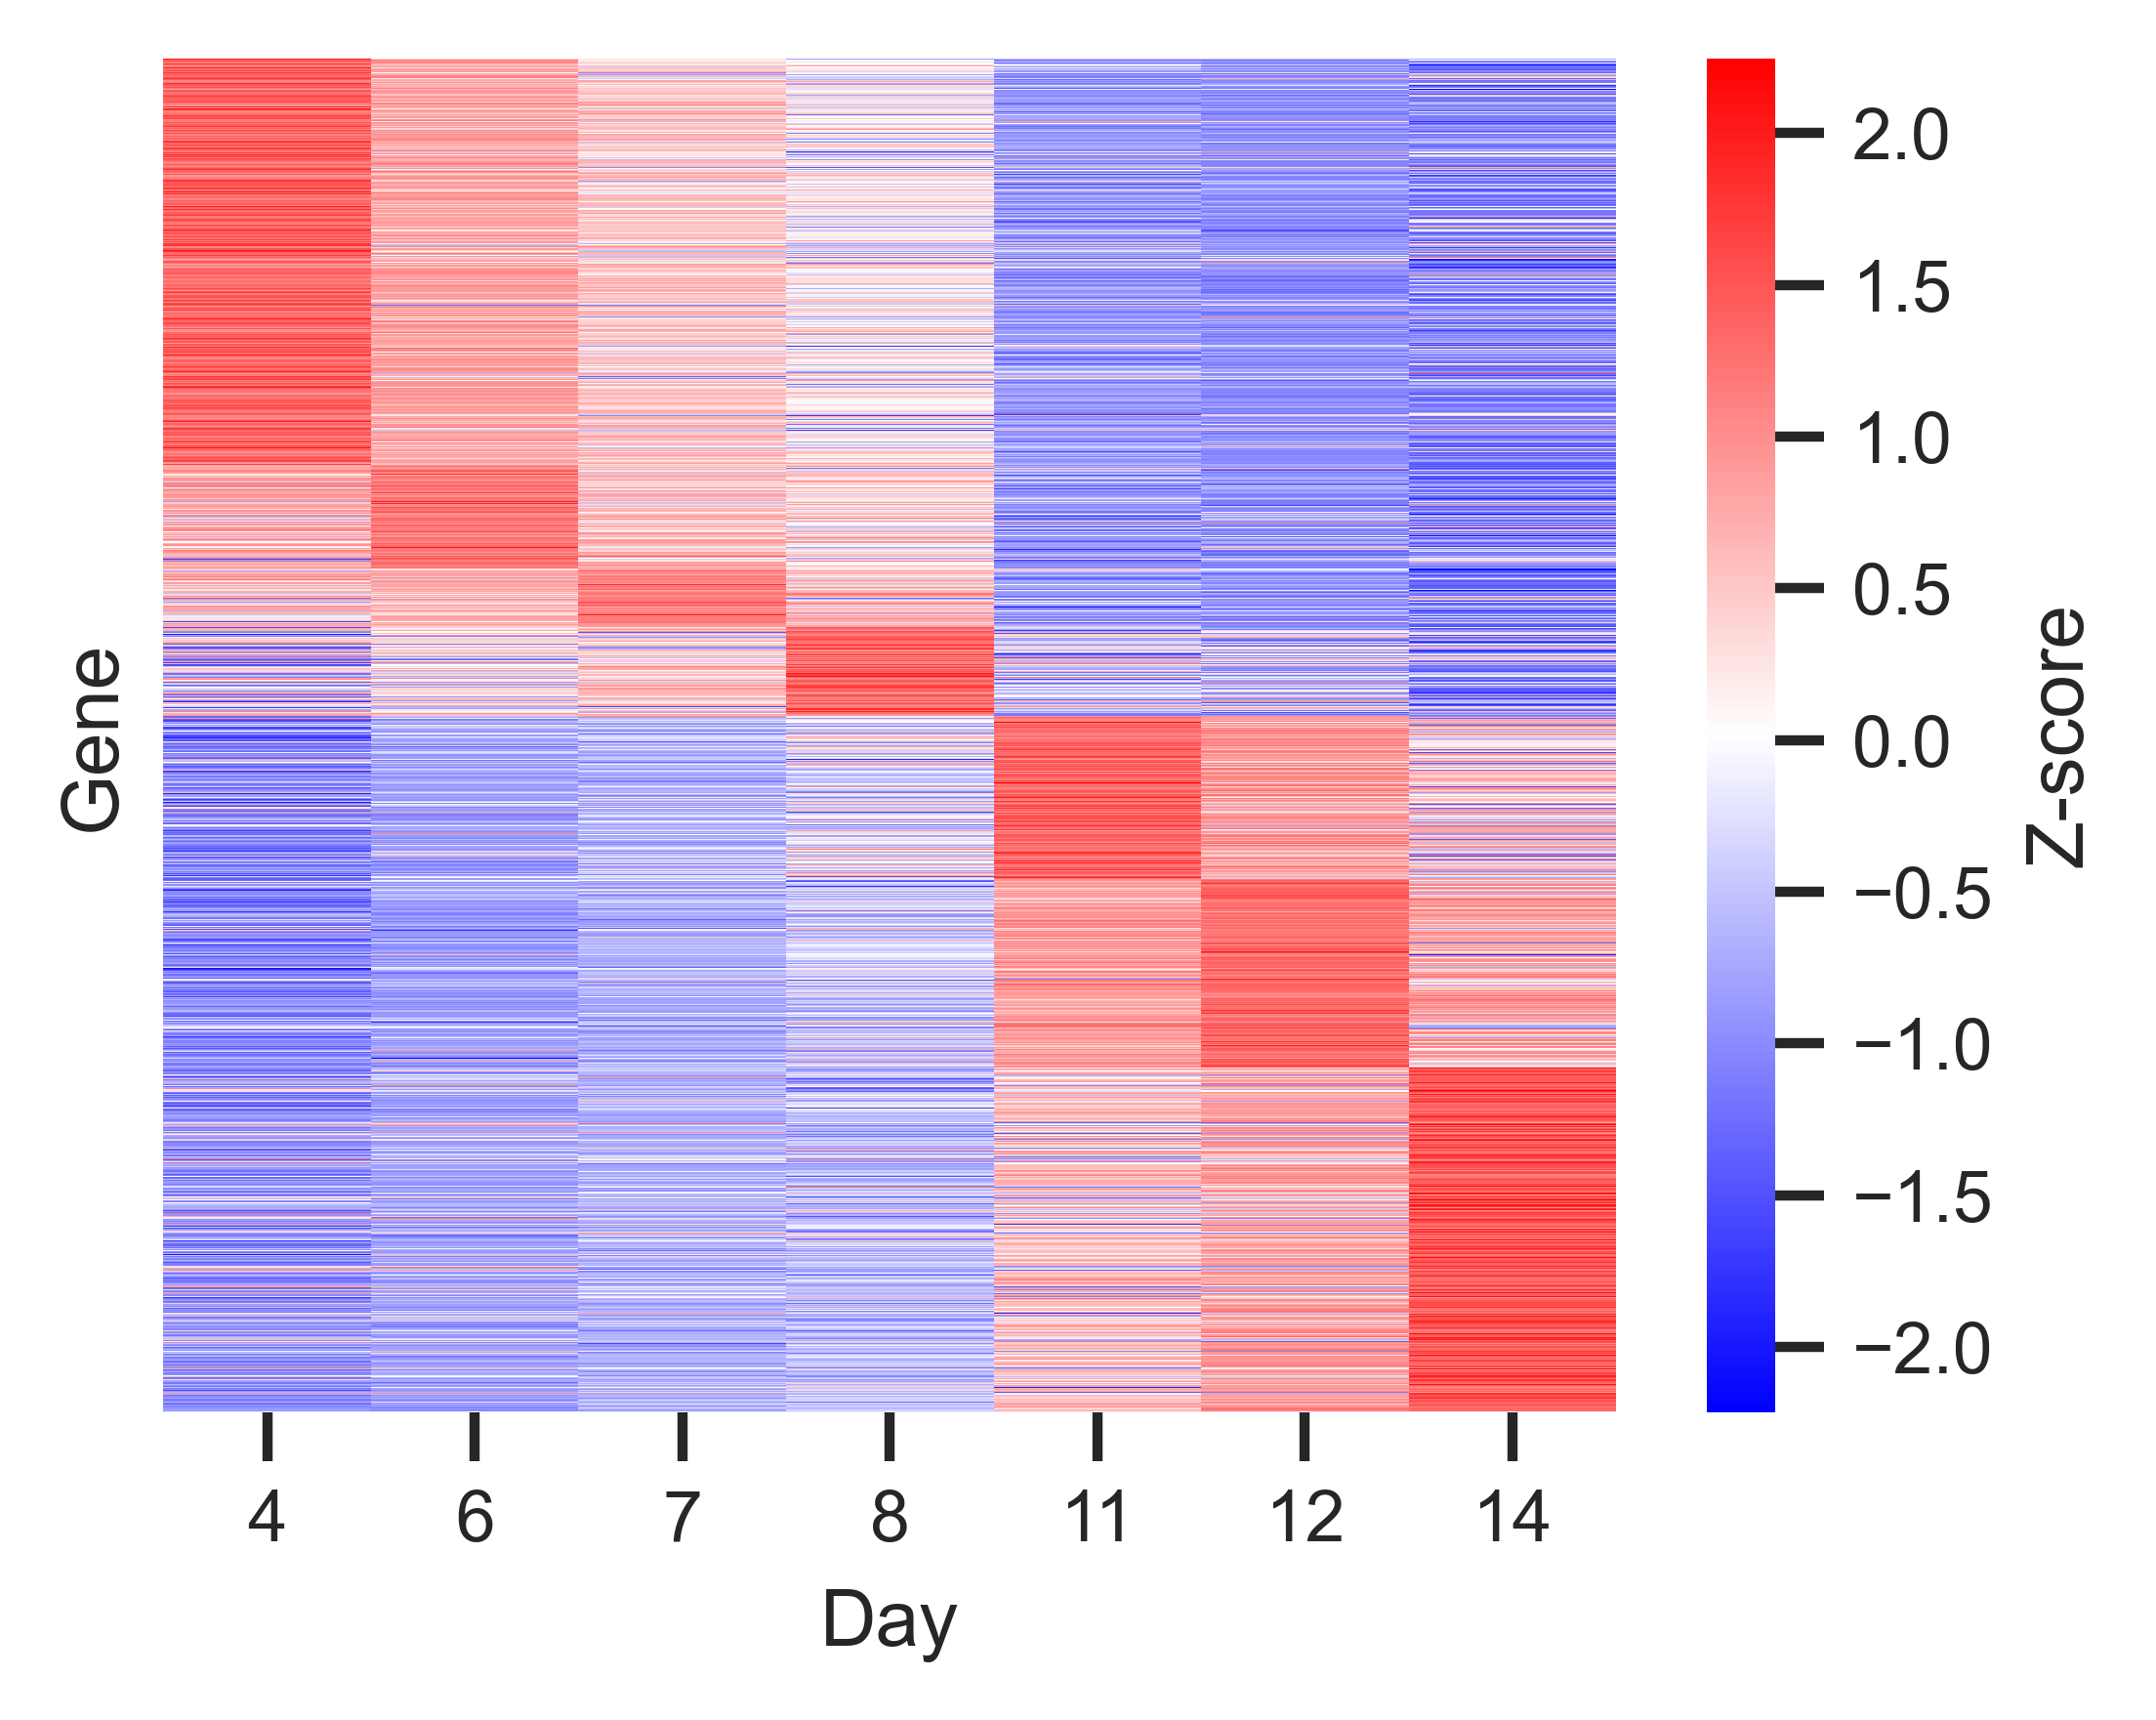

In [41]:
sns.set(font='Arial')
plt.figure(figsize=(4, 3),dpi=600)
sns.set(font_scale=0.8)
ax = sns.heatmap(heatmap_df,yticklabels=False,cmap='bwr',cbar_kws={'label': 'Z-score'})
ax.xaxis.tick_bottom()
plt.xlabel('Day')
plt.savefig('heatmap_251124.png',dpi=600,bbox_inches='tight')
plt.show()

In [67]:
#bubble plot
bubble = pd.read_csv(r'timePhase_enrichment_251124_rmvD5.csv')

In [68]:
time_phases = []
for n in range(len(bubble)):
    if bubble.iloc[n,1] == '4':
        time_phases.append('Early exponential')
    if bubble.iloc[n,1] == '6,7,8':
        time_phases.append('Late exponential')
    if bubble.iloc[n,1] == '11,12,14':
        time_phases.append('Stationary/death')

count = []
for n in range(len(bubble)):
    c = len(bubble['Genes'][n].split(';'))
    count.append(c)
bubble['Count'] = count
bubble['Time Phase'] = time_phases
bubble = bubble.sort_values(by=['Time Phase'])
bubble

,Term,timePhase,Genes,isUnique,Count,Time Phase
11,Cell cycle,4,YWHAE;GSK3B;CDKN1B;MCM7;BUB1B;SMC3;CDC20;PTTG1...,+,64,Early exponential
19,Parkinson disease,4,TXN1;LRRK2;NDUFA10;UBE2L3;PSMD8;TUBA1C;PSMD6;T...,+,61,Early exponential
18,Ribosome biogenesis in eukaryotes,4,RBM28;POP7;POP1;RPP30;NAT10;NMD3;SNU13;PWP2;WD...,+,38,Early exponential
17,Oocyte meiosis,4,YWHAE;CUL1;SMC3;PKMYT1;ADCY6;AURKA;CDC20;RPS6K...,+,39,Early exponential
16,DNA replication,4,FEN1;RNASEH2B;RFC3;PCNA;RNASEH2A;RFC4;MCM7;LIG...,NaN,21,Early exponential
15,Amyotrophic lateral sclerosis,4,NUP107;NUP188;NDUFA10;ACTB;GLE1;PSMD8;TUBA1C;P...,+,92,Early exponential
14,Proteasome,4,PSMD12;PSMD11;PSMD14;PSMA7;PSMB6;PSMD8;PSMB7;P...,+,25,Early exponential
13,mRNA surveillance pathway,4,DAZAP1;RBM8A;CSTF3;EIF4A3;CSTF2;GSPT1;SMG5;EIF...,+,41,Early exponential
12,RNA transport,4,CYFIP1;EIF4A1;NUP107;POP7;NUP188;POP1;FMR1;GEM...,+,78,Early exponential
10,Spliceosome,4,TCERG1;RBM25;DDX46;EIF4A3;HNRNPU;USP39;EIF4A3L...,+,71,Early exponential


In [69]:
colours = ['red','red','red','red','red','red','red','red','red','red',
          'lightgreen','lightgreen','lightgreen',
          'violet','violet','violet','violet','violet','violet','violet','violet','violet','violet',]
bubble['colour'] = colours
colour_map = {}
for n in range(len(colours)):
    colour_map[bubble.iloc[n,5]] = bubble.iloc[n,6]
colour_map

{'Early exponential': 'red',
 'Late exponential': 'lightgreen',
 'Stationary/death': 'violet'}

In [75]:
bubble = bubble.sort_values(by=['Count'])
bubble = bubble.sort_values(by=['Time Phase'])
bubble

,Term,timePhase,Genes,isUnique,Count,Time Phase,colour
17,Oocyte meiosis,4,YWHAE;CUL1;SMC3;PKMYT1;ADCY6;AURKA;CDC20;RPS6K...,+,39,Early exponential,red
12,RNA transport,4,CYFIP1;EIF4A1;NUP107;POP7;NUP188;POP1;FMR1;GEM...,+,78,Early exponential,red
10,Spliceosome,4,TCERG1;RBM25;DDX46;EIF4A3;HNRNPU;USP39;EIF4A3L...,+,71,Early exponential,red
11,Cell cycle,4,YWHAE;GSK3B;CDKN1B;MCM7;BUB1B;SMC3;CDC20;PTTG1...,+,64,Early exponential,red
19,Parkinson disease,4,TXN1;LRRK2;NDUFA10;UBE2L3;PSMD8;TUBA1C;PSMD6;T...,+,61,Early exponential,red
13,mRNA surveillance pathway,4,DAZAP1;RBM8A;CSTF3;EIF4A3;CSTF2;GSPT1;SMG5;EIF...,+,41,Early exponential,red
18,Ribosome biogenesis in eukaryotes,4,RBM28;POP7;POP1;RPP30;NAT10;NMD3;SNU13;PWP2;WD...,+,38,Early exponential,red
15,Amyotrophic lateral sclerosis,4,NUP107;NUP188;NDUFA10;ACTB;GLE1;PSMD8;TUBA1C;P...,+,92,Early exponential,red
14,Proteasome,4,PSMD12;PSMD11;PSMD14;PSMA7;PSMB6;PSMD8;PSMB7;P...,+,25,Early exponential,red
16,DNA replication,4,FEN1;RNASEH2B;RFC3;PCNA;RNASEH2A;RFC4;MCM7;LIG...,NaN,21,Early exponential,red


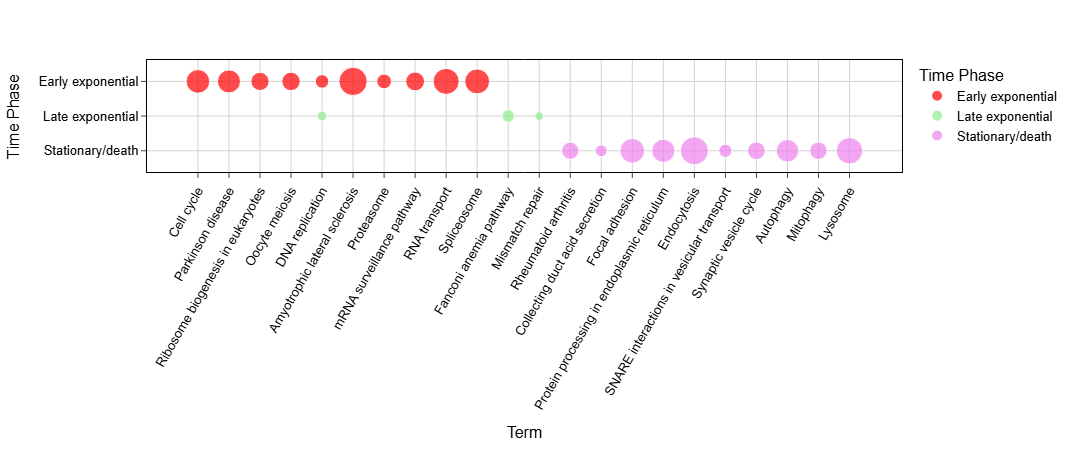

In [70]:
fig = px.scatter(bubble, x="Term", y="Time Phase",
	         size="Count", color='Time Phase',color_discrete_map=colour_map,
                 hover_name="Count")

fig.update_layout(width=850,height=450,
                 font_family='Arial',font=dict(size=13),font_color='black',plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridwidth=1,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',tickangle=300
)

fig.update_yaxes(showgrid=True, gridwidth=1,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey'
)

fig.show()